## Final Project Submission

Please fill out:
* Student name: Robert Crosby 
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Joe Comeaux
* Blog post URL



# introduction
## The purpose of this project is to help Microsoft find the most effective way to allocate its capital while starting a new movie studio.  Movies can be extremly expensive to create so choosing the right type of movie to creat (budget size, genre, critical reception), can potentially have large affects on financial success.  Follow the steps I took below to analize historic movie data from different public data sets and guide Microsoft to invest in the right type of movie.  
## The decisions we will help Microsoft make is whwether they should invest in big budget or small budget films, which genre they should invest in, and how concerned they should be with critical reception.



### The first steps I took were all directed at transfering all data provided in the repository into dataframe format so as to manipulate with pandas.  The data came from the following sources: Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers


### The first file I looked at was one of the csv files

In [2]:
import pandas as pd
df = pd.read_csv('/Users/robertcrosby/Flatiron/dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz')

df.sort_values(by='domestic_gross', ascending=False)
df



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


The next step was unzipping the zipped folder to extract the SQL database

In [3]:
import zipfile


with zipfile.ZipFile('/Users/robertcrosby/Flatiron/dsc-phase-1-project-v2-4/zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('/Users/robertcrosby/Flatiron/dsc-phase-1-project-v2-4/')


We can now see im.db is out of its zipped state and ready to be viewed as a dataframe in its squlite form

In [4]:
! ls

CONTRIBUTING.md     README.md           im.db               student.ipynb
LICENSE.md          awesome.gif         movie_data_erd.jpeg zippedData


In [34]:
import sqlite3 
conn = sqlite3.connect("im.db")
df2 = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    8 non-null      object
dtypes: object(1)
memory usage: 192.0+ bytes


Within the SQlite database the key data was within two tables "movie_basics" and "movie_ratings"

In [6]:
df3 = pd.read_sql("SELECT * FROM movie_basics;", conn)
df4 = pd.read_sql("SELECT * FROM movie_ratings;", conn)


In order to achomplish a Join later we needed to create a "movie" column to match up with another of the dataframes with data we wanted to compare.

In [7]:

df3['movie'] = df3['primary_title']
df3.head()
df3.loc[df3['movie'] == 'Avatar']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie
17060,tt1775309,Avatar,Abatâ,2011,93.0,Horror,Avatar


In [36]:
df3.info()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   movie            146144 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Here again we wanted to create a "movie" column for eventually joining three dataframes to compare values.

In [9]:
df5 = pd.read_csv('/Users/robertcrosby/Flatiron/dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv.gz')

df5['movie'] = df5['title']
df5.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,movie
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Harry Potter and the Deathly Hallows: Part 1
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,How to Train Your Dragon
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Iron Man 2
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,Toy Story
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,Inception


In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
 10  movie              26517 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 2.2+ MB


In [10]:
df6 = pd.read_csv('/Users/robertcrosby/Flatiron/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv.gz')
df6.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


This CSV file was extremly helpful as it had the budgets and gross box office.  However, the earnings were stored as strings so I needed to run code to transform the strings into intergers for mathmatical manipulation.

In [11]:
df6[df6.columns[3:]] = df6[df6.columns[3:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(int)

In [12]:
df6.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [13]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


We want to look at the net profits a film makes not just the gross

In [14]:
df6['net_result'] = df6['worldwide_gross'] - df6['production_budget']

In [15]:
df6.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_result
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


We also want to look at not only the net absolute profits but also the gain in multiples of the cost as a measure.

In [16]:
df6['percentage_gain'] = df6['net_result'] / df6['production_budget']

Given Microsoft's size I chose to filter out films with sub 10mm budget since these films would be too small to move the needle for a company the size of Microsoft.

In [17]:
df_filtered = df6[df6['production_budget'] >= 10000000]
df_filtered.head(25)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_result,percentage_gain
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425,2.211401
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,1.186484
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,1.932070


In [38]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3747 entries, 0 to 3746
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3747 non-null   int64  
 1   release_date       3747 non-null   object 
 2   movie              3747 non-null   object 
 3   production_budget  3747 non-null   int64  
 4   domestic_gross     3747 non-null   int64  
 5   worldwide_gross    3747 non-null   int64  
 6   net_result         3747 non-null   int64  
 7   percentage_gain    3747 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 263.5+ KB


We then looked at a scatter of how budget relates to the multiple or percentage gain

<AxesSubplot:xlabel='production_budget', ylabel='percentage_gain'>

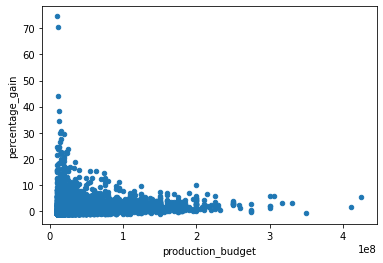

In [18]:
df_filtered.plot.scatter(x = 'production_budget', y = 'percentage_gain')

We now wanted to look at how both genres and reviews affected box office performance.  To achomplish this we needed to join our table with box office performance with the tables with genres and the table with voted ratings.  We were able to join the tables on the movie columns we created earlier.

In [19]:
df10 = pd.merge(df6, df3, how = "inner", on=["movie"] )
df10.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_result,percentage_gain,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


In [39]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3815 non-null   int64  
 1   release_date       3815 non-null   object 
 2   movie              3815 non-null   object 
 3   production_budget  3815 non-null   int64  
 4   domestic_gross     3815 non-null   int64  
 5   worldwide_gross    3815 non-null   int64  
 6   net_result         3815 non-null   int64  
 7   percentage_gain    3815 non-null   float64
 8   movie_id           3815 non-null   object 
 9   primary_title      3815 non-null   object 
 10  original_title     3814 non-null   object 
 11  start_year         3815 non-null   int64  
 12  runtime_minutes    3328 non-null   float64
 13  genres             3743 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 447.1+ KB


In [40]:
df14 = pd.merge(df10, df5, how = "inner", on=["movie"] )
df14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4550 entries, 0 to 4549
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_x               4550 non-null   int64  
 1   release_date_x     4550 non-null   object 
 2   movie              4550 non-null   object 
 3   production_budget  4550 non-null   int64  
 4   domestic_gross     4550 non-null   int64  
 5   worldwide_gross    4550 non-null   int64  
 6   net_result         4550 non-null   int64  
 7   percentage_gain    4550 non-null   float64
 8   movie_id           4550 non-null   object 
 9   primary_title      4550 non-null   object 
 10  original_title_x   4549 non-null   object 
 11  start_year         4550 non-null   int64  
 12  runtime_minutes    4088 non-null   float64
 13  genres             4474 non-null   object 
 14  Unnamed: 0         4550 non-null   int64  
 15  genre_ids          4550 non-null   object 
 16  id_y               4550 

I wanted to clean up the table to show the key values we wanted to compare.  

In [21]:
df15 = df14[['movie', 'production_budget', 'net_result', 'percentage_gain', 'genres','vote_average' ]]
df_cleaned = df15[df15['production_budget'] >= 10000000]
df_cleaner = df_cleaned.drop_duplicates(['movie'])
df_cleaner.head(20)

,movie,production_budget,net_result,percentage_gain,genres,vote_average
0,Avatar,425000000,2351345279,5.532577,Horror,7.4
1,Pirates of the Caribbean: On Stranger Tides,410600000,635063875,1.546673,"Action,Adventure,Fantasy",6.4
2,Avengers: Age of Ultron,330600000,1072413963,3.243841,"Action,Adventure,Sci-Fi",7.3
3,Avengers: Infinity War,300000000,1748134200,5.827114,"Action,Adventure,Sci-Fi",8.3
4,Justice League,300000000,355945209,1.186484,"Action,Adventure,Fantasy",6.2
6,Spectre,300000000,579620923,1.932070,"Action,Adventure,Thriller",6.4
8,The Dark Knight Rises,275000000,809439099,2.943415,"Action,Thriller",7.7
9,Solo: A Star Wars Story,275000000,118151347,0.429641,"Action,Adventure,Fantasy",6.6
10,The Lone Ranger,275000000,-14997885,-0.054538,"Action,Adventure,Western",6.0
11,John Carter,275000000,7778100,0.028284,"Action,Adventure,Sci-Fi",6.1


We can now look at the relationship via a scatter chart comparing the voted avg. vs. box office success. 

<AxesSubplot:xlabel='vote_average', ylabel='percentage_gain'>

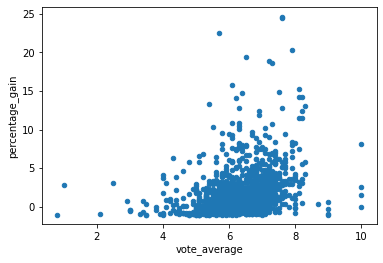

In [22]:
df_cleaner.plot.scatter(x = 'vote_average', y = 'percentage_gain')

<AxesSubplot:xlabel='production_budget', ylabel='net_result'>

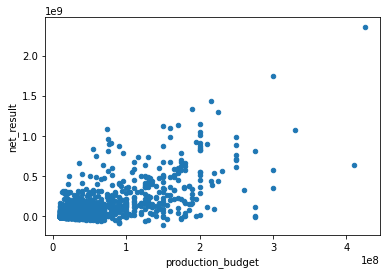

In [23]:
df_cleaner.plot.scatter(x = 'production_budget', y = 'net_result')

In [24]:
df_losers = df_cleaner[df_cleaner['net_result'] <= 0]

<AxesSubplot:xlabel='production_budget', ylabel='net_result'>

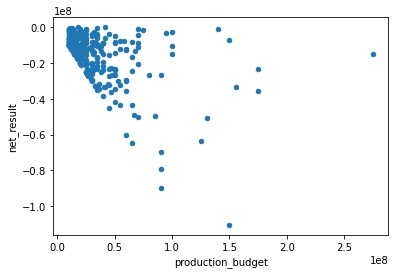

In [25]:
df_losers.plot.scatter(x = 'production_budget', y = 'net_result')

The final analysis I wanted to go through was creating new data frames with only movies that had a certain genre tag.  We could then average the box office performance of the movies with these tags and compare.

In [26]:
dfgene = df_cleaner.groupby('genres', as_index=False)['percentage_gain'].mean()
dfgeneaction = dfgene[dfgene.genres.str.contains("Action")]
dfgenecomedy = dfgene[dfgene.genres.str.contains("Comedy")]
dfgeneanimation = dfgene[dfgene.genres.str.contains("Animation")]

In [27]:
dfgeneaction.info()
dfgenecomedy.info()
dfgeneanimation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genres           59 non-null     object 
 1   percentage_gain  59 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 4 to 147
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genres           63 non-null     object 
 1   percentage_gain  63 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2 to 94
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genres           12 non-null     object 
 1   percentage_gain  12 non-null     float64
dtypes: float64(1), object(1)
memory 

In [28]:
dfgeneaction['percentage_gain'].mean()


1.525776781704189

In [29]:
dfgenecomedy['percentage_gain'].mean()



1.8421518903923588

In [30]:
dfgeneanimation['percentage_gain'].mean()



2.055188010122104

After calculating the averages I could create a dataframe to present the data in a bar chart- the data clearly pointed to animated films being more successful.  

In [31]:
data = [['action' , 1.536], ['comedy', 1.842], ['animation', 2.055]]
genrechoice = pd.DataFrame(data, columns = ['genre', 'average_return'])

In [32]:
genrechoice

,genre,average_return
0,action,1.536
1,comedy,1.842
2,animation,2.055


<AxesSubplot:xlabel='genre'>

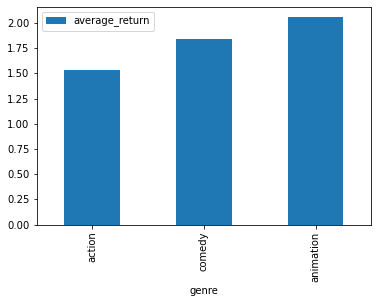

In [33]:
genrechoice.plot.bar(x='genre')

# Conclusion 

## For this study we asked three questions 1) Should Microsoft invest in big budget or low budget films 2) Should Microsoft focus on a specific genre and 3) how focused should Microsoft be on critical ratings.  These were the findings:

### Low budget films offer the best opportunity for extremely high percentage returns.  But given Microsoft’s size and capital the absolute returns possible through large budget productions is more appropriate.
### Microsoft should focus on animation which not only provides higher historic avg. returns but also would play to their technology strengths 
### Microsoft should focus on hiring a team able to deliver well received movies critically, but not feel the need to overpay for prestige films (marginal net returns past a ratings of 6 and potentially negative past 8).  
